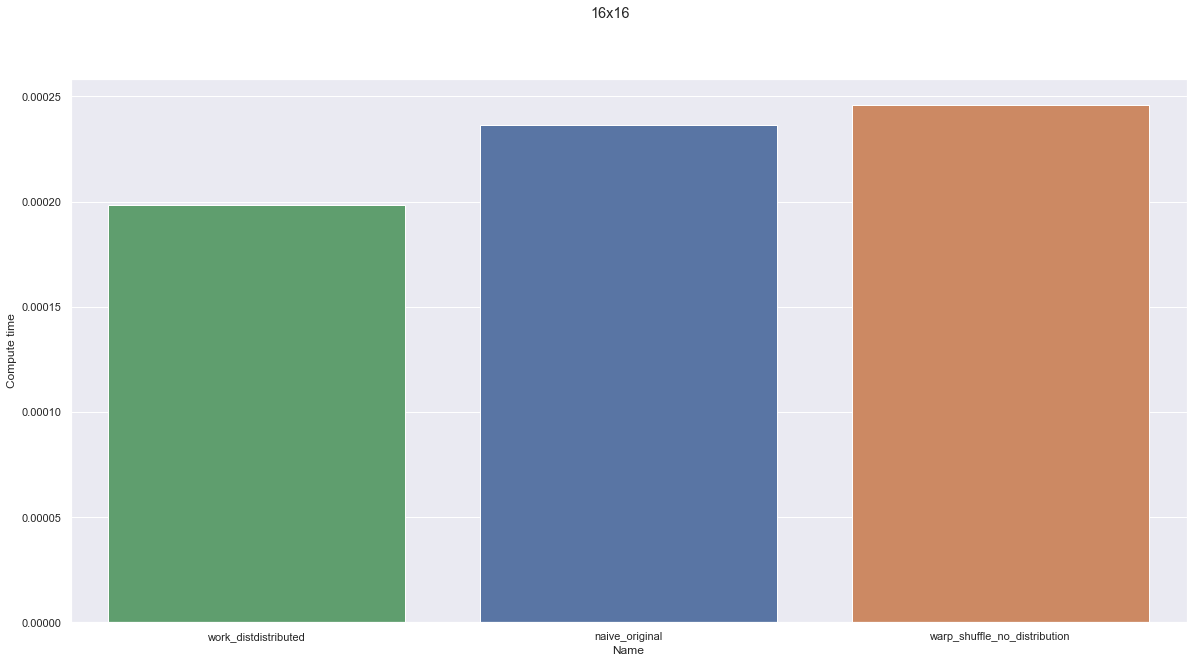

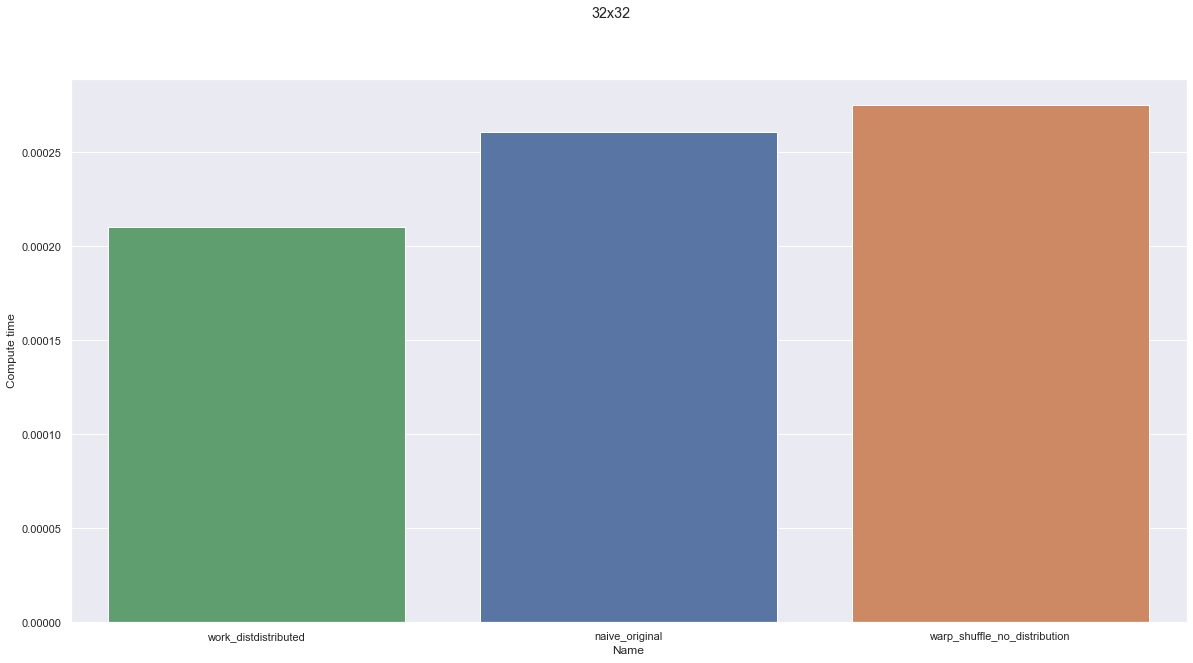

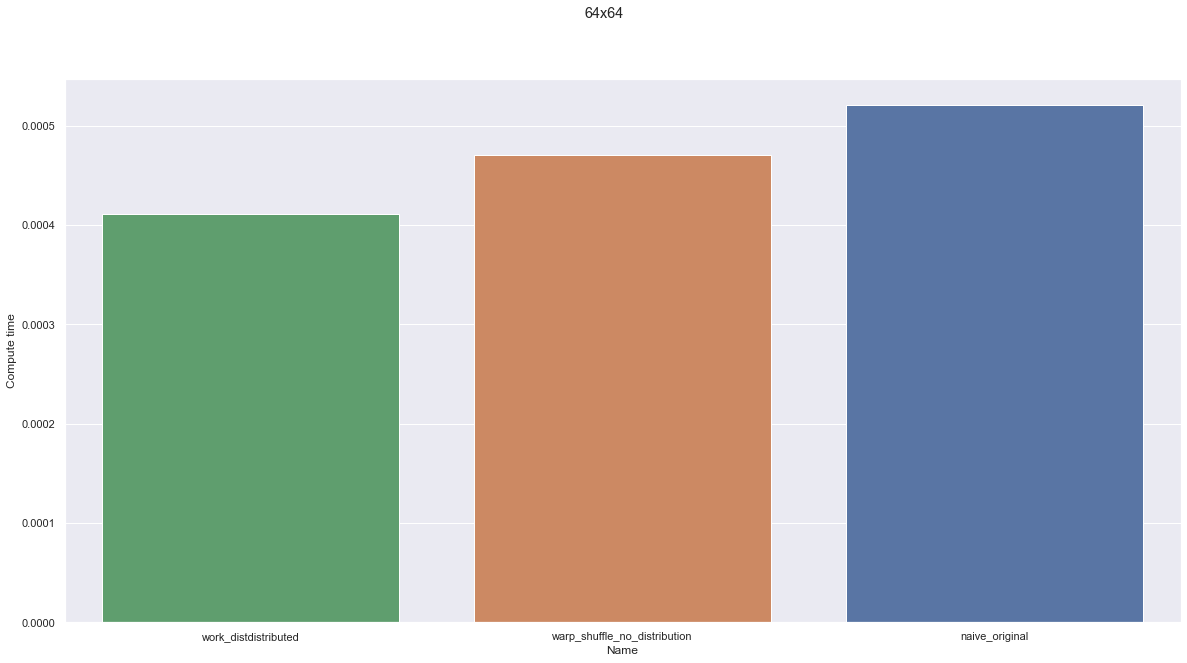

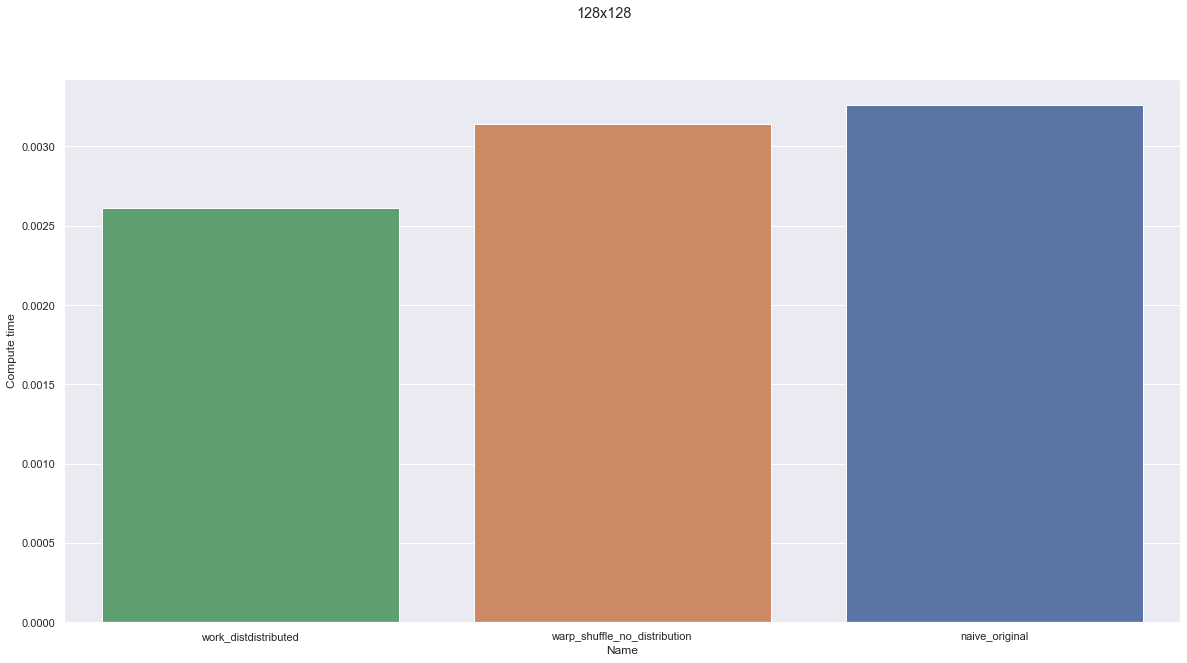

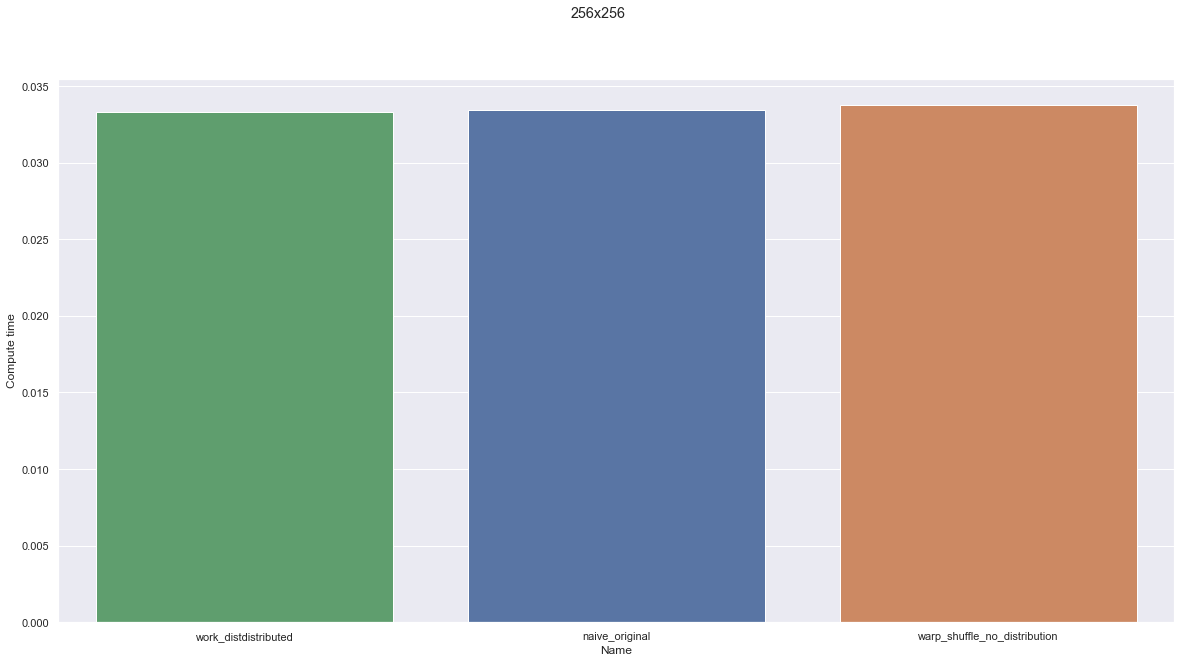

In [11]:
import re

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shared import Benchmark, Run, Group

from pathlib import Path
from typing import List, Tuple, Dict

all_stages = ["Load", "Prepare", "Transfer", "Run", "Finalize"]
compute_stages = ["Prepare", "Transfer", "Run", "Finalize"]

sns.set(rc={'figure.figsize':(20,10)})

benchmark = Benchmark.load(Path.cwd().parent / "benchmarking" / "test" / "warp_shuffle")

group = benchmark.groups["one_to_one"]

for size in [16*16, 32*32, 64*64, 128*128, 256*256]:
    fig, ax = plt.subplots()
    fig.suptitle(f"{int(math.sqrt(size))}x{int(math.sqrt(size))}")

    data = pd.concat([run.data for run in group.runs if run.input_area() == size], join="inner")
    compute_times = data.groupby(["Name", "Args"])[compute_stages].apply(lambda x: x.mean().sum() / 1e9).reset_index(name="Compute time").sort_values("Compute time")
    compute_times = compute_times[compute_times["Compute time"] == compute_times.groupby(["Name"])["Compute time"].transform('min')]
    compute_times = compute_times[compute_times["Name"] != "fft"]

    names = sorted(compute_times["Name"].unique())
    palette = dict(zip(names, sns.color_palette(n_colors=len(names))))

    ax = sns.barplot(data=compute_times, x="Name", y="Compute time", ax=ax, dodge=False, palette=palette)
    #ax.tick_params(axis='x', labelrotation=90)
